## <div align=center>Assignment 02</div>

In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

The GridWorld class encapsulates a simplified gridworld environment for reinforcement learning. It defines a 3x4 grid with an  initialized agent. The grid contains associated rewards for each cell, where encountering the danger results in a penalty (-10) and reaching the goal yields a reward (+100). The agent can take actions such as 'UP,' 'DOWN,' 'LEFT,' or 'RIGHT' to move within the grid, with boundaries enforced to prevent moving outside. The class provides methods to check available actions, display the grid with agent, goal, and danger locations for debugging, retrieve rewards for specific locations, simulate agent movements, and check if the agent is in a terminal state (goal or danger). This class serves as a foundational component for developing reinforcement learning algorithms in a gridworld scenario.

In [7]:
class GridWorld:
    #ref https://gist.github.com/luqmanjamilch/f7a92c7419bdc47fdf231e7acb3bc63b
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 3
        self.width = 4
        self.grid = np.zeros(( self.height, self.width)) - 1
        
        # Set random start location for the agent
        self.current_location = ( 2, 2) #starting position
        
        # Set locations for the danger and the goal
        self.danger_location = (1,2)
        self.goal_location = (0,0)
        self.terminal_states = [ self.danger_location, self.goal_location]
        
        # Set grid rewards for special cells
        self.grid[ self.danger_location[0], self.danger_location[1]] = -10
        self.grid[ self.goal_location[0], self.goal_location[1]] = 100
        
        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
    
    # Returns possible actions
    def get_available_actions(self):       
        return self.actions
           
     #Prints out current location of the agent on the grid, along with goal and danger locations (used for debugging)
    def agent_on_map(self):        
        grid = np.zeros((self.height, self.width))

        # Mark agent's location
        grid[self.current_location[0], self.current_location[1]] = 1

        # Mark goal location
        grid[self.goal_location[0], self.goal_location[1]] = 100

        # Mark danger location
        grid[self.danger_location[0], self.danger_location[1]] = -10

        return grid
    
    #Returns the reward for an input position   
    def get_reward(self, new_location):             
        return self.grid[ new_location[0], new_location[1]]
        
    # Moves the agent in the specified direction. If agent is at a border, agent stays still
    # but takes negative reward. Function returns the reward for the move.
    def make_step(self, action):       
        # Store previous location
        last_location = self.current_location
        
        # UP
        if action == 'UP':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        
        # DOWN
        elif action == 'DOWN':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
            
        # LEFT
        elif action == 'LEFT':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
                
        return reward
    
    # Check if the agent is in a terminal state (goal or danger), if so return 'TERMINAL'
    def check_state(self):              
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

**Which algorithm you will go with and why?**

For this Grid wold problem, Q-learning is chosen for its effectiveness in solving. Its model-free approach, suitability for defined state-action spaces, and exploration-exploitation balance make it ideal. The algorithm's stability, convergence properties, and adaptability contribute to learning optimal policies in dynamic environments.


The **Q_Agent** class represents an agent in a reinforcement learning scenario, employing the Q-learning algorithm to learn optimal actions in a given environment. Initialized with parameters such as exploration rate (epsilon), learning rate (alpha), and discount factor (gamma), the agent maintains a Q-value table, where each grid space has associated Q-values for possible actions ('UP,' 'DOWN,' 'LEFT,' 'RIGHT'). 

The **choose_action** method decides the agent's next action based on the Q-values of the current location, with an exploration-exploitation trade-off controlled by the exploration rate. 

The **learn** method updates the Q-value table using the Q-learning formula, incorporating rewards and the maximum Q-value in the next state. Overall, this class enables an agent to interact with its environment, learn from experiences, and make decisions to maximize cumulative rewards through Q-learning.

The **learn** method implement the following mathematical equitation.
![Q learning Equation](image.png)



In [3]:
class Q_Agent():
    # Intialise
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict() # Store all Q-values in dictionary of dictionaries 
        for x in range(environment.height): # Loop through all possible grid spaces, create sub-dictionary for each
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0} # Populate sub-dictionary with zero values for possible moves

        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        
    # Returns the optimal action from Q-Value table. If multiple optimal actions, chooses random choice. Will make an exploratory random action dependent on epsilon.
    def choose_action(self, available_actions):        
        if np.random.uniform(0,1) < self.epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]            
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    # Updates the Q-value table using Q-learning
    def learn(self, old_state, reward, new_state, action):        
        q_values_of_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_of_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)        

The **play** function simulates the interaction between a reinforcement learning agent and an environment over multiple trials. It takes as input the environment and agent instances, the number of trials, the maximum number of steps per episode, and a flag indicating whether the agent should learn from its experiences. During each trial, the agent selects actions based on its current policy, and the environment responds with rewards and new states. If learning is enabled, the agent updates its Q-values using the Q-learning algorithm. The function records the cumulative rewards obtained in each trial and returns a performance log, providing insights into the agent's learning progress and overall effectiveness in the given environment.

In [4]:
# The play function runs iterations and updates Q-values if desired.
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):   
    reward_per_episode = [] # Initialise performance log
    
    for trial in range(trials): # Run trials
        cumulative_reward = 0 # Initialise values of each game
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL': # If game is in terminal state, game over and start next trial
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log
        
    return reward_per_episode # Return performance log

The provided code initializes an environment (GridWorld) and an agent (Q_Agent). The GridWorld represents a grid-based environment with specific characteristics,The Q_Agent is an agent designed for Q-learning, which interacts with the environment to learn optimal actions through a Q-value table. 

It prints the output to show the steps it get negative or positive reward based on the action it take

To answer the question **what are the states in the layout ?**


In the provided code, the states in the layout correspond to different positions on the grid within the GridWorld environment. Each state is represented by a tuple (x, y), where 'x' and 'y' are the coordinates of the agent on the grid. The agent can be in any position within the grid, and these positions constitute the states of the environment. The states exclude any terminal states where the agent reaches either the goal or the danger, as these states conclude the episode. 

To answer the question **What are the actions for the robot ?**

In the given code, the agent has four possible actions:

*Move UP*

*Move DOWN*

*Move LEFT*

*Move RIGHT*

These actions represent the possible directions in which the agent can move within the grid in the GridWorld environment. The agent can choose one of these actions at each step to navigate through the grid and interact with the environment.

In [5]:
env = GridWorld()
agent =  Q_Agent(env)

available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
print('------------------------------------------')
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print('------------------------------------------')
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print('------------------------------------------')
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print('------------------------------------------')

Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
------------------------------------------
Current position of the agent = (2, 2)
[[100.   0.   0.   0.]
 [  0.   0. -10.   0.]
 [  0.   0.   1.   0.]]
Randomly chosen action = DOWN
Reward obtained = -1.0
------------------------------------------
Current position of the agent = (2, 2)
[[100.   0.   0.   0.]
 [  0.   0. -10.   0.]
 [  0.   0.   1.   0.]]
Randomly chosen action = DOWN
Reward obtained = -1.0
------------------------------------------
Current position of the agent = (2, 2)
[[100.   0.   0.   0.]
 [  0.   0. -10.   0.]
 [  0.   0.   1.   0.]]
Randomly chosen action = RIGHT
Reward obtained = -1.0
------------------------------------------


In the below code snippet, an instance of the GridWorld environment and a Q-learning agent (Q_Agent) are created. The agent chooses an action, makes a step in the environment, and receives a reward. This process is repeated multiple times for the 500 trials we configured above, the rewards so obtained are printed for each iteration.

To answer the question **How would you design the reward?**

Rewards are determined based on the agent's actions and the current state of the environment. The rewards are predefined for certain states: stepping on the danger location results in a reward of -10, reaching the goal location yields a reward of 100, and all other non-terminal states provide a constant reward of -10. The Q-learning algorithm uses these rewards to update its Q-values during the learning 

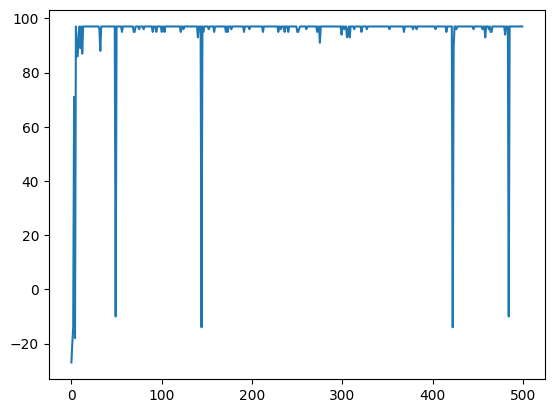

In [6]:
environment = GridWorld()
agentQ =  Q_Agent(environment)

# Note the learn=True argument!
reward_per_episode = play(environment, agentQ, trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)
plt.show()